Pembuatan label aspek untuk confussion matrix pada k-means

In [ ]:
import pandas as pd
import json

df = pd.read_csv('dataset_belabel/klaster_prediksi.csv')

# Tentukan Aspek dengan Skor
def tentukan_aspek(text, aspek_kompensasi, aspek_kepuasan_kerja, aspek_aktualisasi, aspek_hubungan):
    # Hitung jumlah kata yang cocok dengan aspek
    kompensasi = sum(1 for word in text.split() if word in aspek_kompensasi)
    kepuasan = sum(1 for word in text.split() if word in aspek_kepuasan_kerja)
    aktualisasi = sum(1 for word in text.split() if word in aspek_aktualisasi)
    hubungan = sum(1 for word in text.split() if word in aspek_hubungan)

    # Tentukan label dan skor
    scores = {
        'Kompensasi': kompensasi,
        'Kepuasan Kerja': kepuasan,
        'Aktualisasi': aktualisasi,
        'Hubungan': hubungan
    }

    # Pilih aspek dengan skor terbanyak
    label_aspek = max(scores, key=scores.get)
    # skor_aspek = scores[label_aspek]

    return label_aspek

# Load lexicon for each aspect
def load_lexicon(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return set(json.load(file))

# Load leksikon dari file
aspek_kompensasi = load_lexicon('leksikon/aspek-kompensasi.json')
aspek_kepuasan = load_lexicon('leksikon/aspek-kepuasan-kerja.json')
aspek_aktualisasi = load_lexicon('leksikon/aspek-aktualisasi.json')
aspek_hubungan = load_lexicon('leksikon/aspek-hubungan-kerja.json')

df['teks-kmeans'] = df['teks-kmeans'].fillna('').astype(str)

# Misalkan df adalah DataFrame yang sudah ada dan memiliki kolom 'teks'
# Terapkan fungsi tentukan_aspek pada kolom 'teks' dan simpan hasilnya pada kolom baru
df[['label-aspek']] = df['teks-kmeans'].apply(
    lambda x: pd.Series(tentukan_aspek(x, aspek_kompensasi, aspek_kepuasan, aspek_aktualisasi, aspek_hubungan))
)

# Menambahkan kolom 'skor-label-aspek' berdasarkan kondisi tertentu
def assign_skor_label_aspek(label_aspek):
    if 'Kompensasi' in label_aspek:
        return 0
    elif 'Kepuasan Kerja' in label_aspek:
        return 1
    elif 'Aktualisasi' in label_aspek:
        return 2
    elif 'Hubungan' in label_aspek:
        return 3
    else:
        return  # Nilai default jika tidak ada yang cocok

# Terapkan fungsi ke kolom 'label-aspek' untuk membuat kolom 'skor-label-aspek'
df['skor-label-aspek-aktual'] = df['label-aspek'].apply(assign_skor_label_aspek)

df.to_csv('dataset_berlabel/klaster-aktual.csv', index=False)


In [11]:
import pandas as pd
aktual = pd.read_csv('dataset_berlabel/klaster-aktual.csv')
prediksi = pd.read_csv('dataset_berlabel/klaster-prediksi.csv')
aktual = pd.DataFrame(aktual, columns=['skor-label-aspek-aktual'])
prediksi = pd.DataFrame(prediksi, columns=['label-klaster'])

In [12]:
unique_values_kolom1 = aktual['skor-label-aspek-aktual'].unique()
unique_values_kolom1

array([0, 2, 3, 1])

In [14]:
unique_values_kolom2 = prediksi['label-klaster'].unique()
unique_values_kolom2

array([0, 3, 2, 1])

Confussion matrix (k-means)

Akurasi: 52.46%
Presisi: 0.83
Recall: 0.52
F1 Score: 0.61


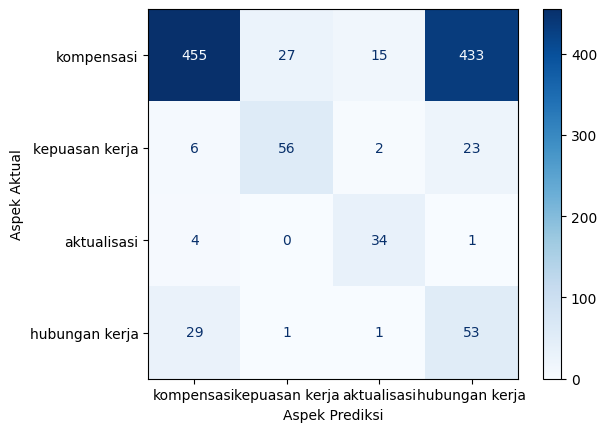

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Ekstrak nilai aktual dan prediksi dari kolom DataFrame
y_actual = aktual['skor-label-aspek-aktual']
y_pred = prediksi['label-klaster']

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_actual, y_pred)

# Definisikan label aspek
aspek_labels = ['kompensasi', 'kepuasan kerja', 'aktualisasi', 'hubungan kerja']

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=aspek_labels)
disp.plot(cmap="Blues")

# Mengubah label sumbu X dan Y
plt.xlabel('Aspek Prediksi')  # Mengubah label X menjadi 'Aspek Prediksi'
plt.ylabel('Aspek Aktual')    # Mengubah label Y menjadi 'Aspek Aktual'

# Hitung metrik evaluasi
accuracy = accuracy_score(y_actual, y_pred)
precision = precision_score(y_actual, y_pred, average='weighted')  # Menggunakan rata-rata berbobot untuk multi-kelas
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')

# Tampilkan hasil metrik evaluasi
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Menampilkan plot
plt.show()


Confussion matrix (ABSA)

Akurasi: 0.84
Presisi: 0.86
Recall: 0.84
F1 Score: 0.82


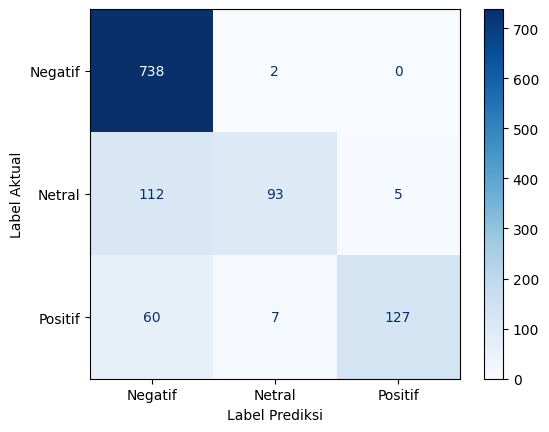

In [17]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Membaca data aktual dan prediksi
klasifikasiaktual = pd.read_csv('dataset-berlabel.csv')
klasifikasiprediksi = pd.read_csv('hasil_prediksi.csv')

# Mengambil kolom label
klasifikasiaktual = pd.DataFrame(klasifikasiaktual, columns=['label'])
klasifikasiprediksi = pd.DataFrame(klasifikasiprediksi, columns=['label'])

# Ekstrak nilai aktual dan prediksi dari kolom DataFrame
y_actual = klasifikasiaktual['label']
y_pred = klasifikasiprediksi['label']

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_actual, y_pred)
classes = sorted(set(y_actual) | set(y_pred))  # Semua kelas unik dari data aktual dan prediksi

# # Tampilkan confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

# Hitung akurasi
accuracy = accuracy_score(y_actual, y_pred)
# print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Akurasi: {accuracy :.2f}")

# Hitung presisi, recall, dan F1 score
precision = precision_score(y_actual, y_pred, average='weighted')  # Rata-rata berbobot untuk multi-kelas
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')

# Tampilkan nilai presisi, recall, dan F1 score
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap="Blues")

# Mengubah label sumbu X dan Y
plt.xlabel('Label Prediksi')  # Mengubah label X menjadi 'Prediksi'
plt.ylabel('Label Aktual')    # Mengubah label Y menjadi 'Aktual'

plt.show()
